In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
print(x_test.shape)

(10000, 32, 32, 3)


In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
classes = ["airplane", "autombile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

TypeError: ignored

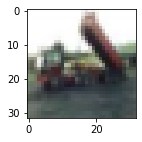

In [9]:
plot_sample(x_train, y_train, 2)

TypeError: ignored

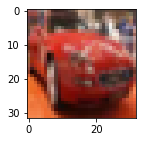

In [10]:
plot_sample(x_train, y_train, 5)

In [11]:
#normalizing our dataset images from values of pixels between 0-255 to 0-1
x_train = x_train/255
x_test = x_test/255

In [12]:
x_train[3]

array([[[0.10980392, 0.09803922, 0.03921569],
        [0.14509804, 0.13333333, 0.0745098 ],
        [0.14901961, 0.1372549 , 0.07843137],
        ...,
        [0.29803922, 0.2627451 , 0.15294118],
        [0.31764706, 0.28235294, 0.16862745],
        [0.33333333, 0.29803922, 0.18431373]],

       [[0.12941176, 0.10980392, 0.05098039],
        [0.13333333, 0.11764706, 0.05490196],
        [0.1254902 , 0.10588235, 0.04705882],
        ...,
        [0.37254902, 0.32156863, 0.21568627],
        [0.37647059, 0.32156863, 0.21960784],
        [0.33333333, 0.28235294, 0.17647059]],

       [[0.15294118, 0.1254902 , 0.05882353],
        [0.15686275, 0.12941176, 0.06666667],
        [0.22352941, 0.19607843, 0.12941176],
        ...,
        [0.36470588, 0.29803922, 0.20392157],
        [0.41960784, 0.34901961, 0.25882353],
        [0.37254902, 0.30196078, 0.21176471]],

       ...,

       [[0.3254902 , 0.28627451, 0.20392157],
        [0.34117647, 0.30196078, 0.21960784],
        [0.32941176, 0

In [13]:
#Encoding the labels using np_utils
y_train = np_utils.to_categorical(y_train)
y_test =np_utils.to_categorical(y_test)

In [14]:
#Building our Convolution neural network
model = Sequential()

In [15]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(2,2),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2064      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [18]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.5885 - accuracy: 0.4208
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.2898 - accuracy: 0.5394
Epoch 3/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.1725 - accuracy: 0.5854
Epoch 4/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0960 - accuracy: 0.6124
Epoch 5/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.0479 - accuracy: 0.6310
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0091 - accuracy: 0.6438
Epoch 7/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9771 - accuracy: 0.6569
Epoch 8/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9549 - accuracy: 0.6651
Epoch 9/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9334 - accuracy: 0.6721
Epoch 10/10
1563/1563 [==============================] - 45s 29m

In [19]:
#evaluating our test data
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.0120 - accuracy: 0.6461


[1.0120011568069458, 0.6460999846458435]

In [21]:
y_pred = model.predict(x_test)
y_pred[:5]

array([[3.6838541e-03, 4.2459674e-04, 7.7657369e-03, 3.7921542e-01,
        1.3557195e-03, 3.9665169e-01, 1.8409440e-01, 6.0742762e-04,
        2.5400370e-02, 8.0076756e-04],
       [8.6783953e-03, 4.7289506e-01, 2.7651424e-05, 1.0045292e-05,
        1.3471248e-06, 1.7546829e-06, 1.3814885e-05, 2.0798213e-07,
        5.1265079e-01, 5.7209800e-03],
       [4.6017915e-02, 2.1288723e-01, 2.7210901e-03, 3.5450752e-03,
        3.5301328e-04, 5.3874269e-04, 7.1025616e-04, 1.2548998e-04,
        7.0495892e-01, 2.8142300e-02],
       [5.7461125e-01, 6.5597713e-02, 1.2551699e-02, 8.1597915e-04,
        2.9182460e-03, 2.1191113e-04, 3.2905857e-03, 4.8215874e-04,
        3.2099727e-01, 1.8523145e-02],
       [4.0782103e-05, 2.3351929e-05, 1.4003738e-02, 1.8704804e-02,
        6.7809656e-02, 1.0206451e-03, 8.9835584e-01, 1.9359686e-05,
        1.2823019e-05, 9.0076592e-06]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 0, 6]

In [23]:
y_test[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

TypeError: ignored

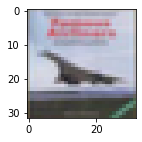

In [24]:
plot_sample(x_test, y_test,3)

In [25]:
classes[y_classes[3]]

'airplane'